# Recurrent Neural Networks for Track Detection In Noise

                                            Jüri Sildam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from keras.models import model_from_json
%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras import optimizers
import utils


Using TensorFlow backend.


In [2]:
from importlib import reload
reload(utils);

In [3]:
utils.track_y_3D

<function utils.track_y_3D>

In [4]:
keras_model_load = True # False, True
DATA_PATH = ''
test_fname_start = 'test_linear'
train_fname_start = 'train_linear'
no_files = 1
dxn = 10
batch_size = 3
row1_train = 60
row2_train = 90
row1_test = 100
row2_test = 150
batch_size = 3

train_X, train_y_true = utils.load_data(DATA_PATH, train_fname_start, no_files)
test_X, test_y_true = utils.load_data(DATA_PATH, test_fname_start, no_files)

In [5]:
if keras_model_load:
    model_name = 'keras_3k_dat_linmodel'
    model_lin = utils.load_keras_model(model_name)
else:
    np.random.seed(17)
    input_shape = (train_X.shape[1],train_X.shape[2])
    hidden_size = 16
    model_lin = Sequential()
    model_lin.add(LSTM(input_shape=input_shape, output_dim=hidden_size, return_sequences=True))
    model_lin.add(Dense(hidden_size))
    model_lin.add(Activation('relu'))
    model_lin.add(Dense(output_dim=1, activation="relu"))
    optimizer = optimizers.Adam(clipnorm=2)
    model_lin.compile(optimizer=optimizer, loss='binary_crossentropy')
    model_lin.summary()


Model loaded from file


In [6]:
if not keras_model_load:
    y3D = utils.track_y_3D(train_y_true, n = dxn)
    model_lin.fit(train_X, y3D, epochs = 100, batch_size = batch_size, verbose = 1, shuffle=True)

In [7]:
Y_estim_train = model_lin.predict(train_X, batch_size = batch_size)
Y_estim_test = model_lin.predict(test_X, batch_size = batch_size)

In [8]:
Y_estim_train=Y_estim_train.sum(axis=1)/Y_estim_train.shape[1]
Y_estim_test=Y_estim_test.sum(axis=1)/Y_estim_test.shape[1]

Y_estim_test[Y_estim_test < 0.5]=0
Y_estim_test[Y_estim_test >= 0.5]=1
Y_estim_train[Y_estim_train < 0.5]=0
Y_estim_train[Y_estim_train >= 0.5]=1

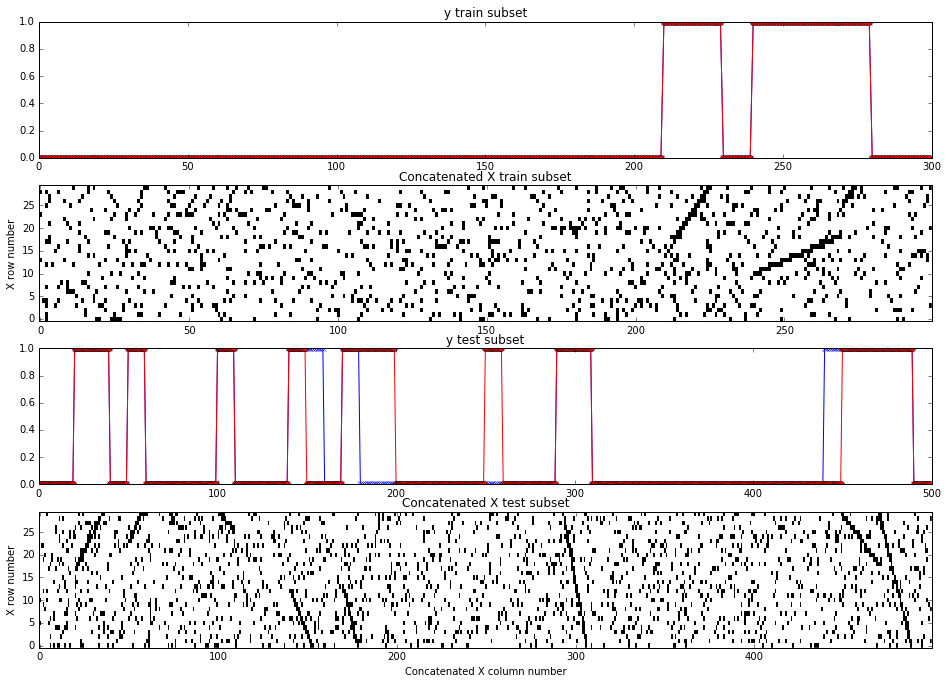

In [9]:
utils.plot_results(test_y_true, Y_estim_test, train_X, train_y_true, Y_estim_train, test_X,
                 dxn, row1_train, row2_train, row1_test, row2_test, N_plots = 7)

In [10]:
utils.roc_dat(Y_estim_test, test_y_true, 0.5)

Pd:  0.629 # of true positives:  70.0 # of estimated positives:  71.0
P_false_pos_rate:  0.117 # of true negatives:   230.0 # of estimated negatives:  229.0


In [11]:
utils.roc_dat(Y_estim_train, train_y_true, 0.5)

Pd:  0.988 # of true positives:  651.0 # of estimated positives:  649.0
P_false_pos_rate:  0.003 # of true negatives:   2349.0 # of estimated negatives:  2351.0
